In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglogUKC import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv4 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [8]:
designated_ukc_cls = 2
num_classes = 2

In [4]:
designated_ukc_cls = 2
num_classes = 2
bglog = BGLog(save_padded_num_sequences=False, debug=True,  load_from_pkl=True, )
train_test = bglog.get_tensor_train_val_test(ablation=20000, designated_ukc_cls=designated_ukc_cls )
train_data, val_data, test_data = train_test

ablation set to : 20000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 16000
val_0:, 2000
test_0:, 2000
train_1:, 16000
val_1:, 2000
test_1:, 2000
class 2 is added as ukc
ukc_2:, 2000
902 data in class 3 not enough to split into train:16000 and validation:2000, adding the entire data as ukc
628 data in class 4 not enough to split into train:16000 and validation:2000, adding the entire data as ukc
165 data in class 5 not enough to split into train:16000 and validation:2000, adding the entire data as ukc
75 data in class 6 not enough to split into train:16000 and validation:2000, adding the entire data as ukc
train: 0    16000
1    16000
Name: label, dtype: int64
val: 0    2000
1    2000
Name: label, dtype: int64
test: 0    2000
1    2000
2    2000
Name: label, dtype: int64
[[1. 0.]
 [1. 0.]]
some example of labels:
[[1. 0. 0.]
 [1. 0. 0.]]
[[

In [6]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=num_classes)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=val_data, epochs=7) 

vocab_size: 50
Epoch 1/7
1000/1000 [==============================] - 94s 93ms/step - loss: 0.0121 - accuracy: 0.9962 - precision_1: 0.9962 - recall_1: 0.9962 - val_loss: 0.0076 - val_accuracy: 0.9990 - val_precision_1: 0.9990 - val_recall_1: 0.9990
Epoch 2/7
1000/1000 [==============================] - 93s 93ms/step - loss: 0.0058 - accuracy: 0.9993 - precision_1: 0.9993 - recall_1: 0.9993 - val_loss: 0.1550 - val_accuracy: 0.9680 - val_precision_1: 0.9680 - val_recall_1: 0.9680
Epoch 3/7
1000/1000 [==============================] - 97s 97ms/step - loss: 9.5328e-09 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 0.1551 - val_accuracy: 0.9678 - val_precision_1: 0.9678 - val_recall_1: 0.9678
Epoch 4/7
1000/1000 [==============================] - 96s 96ms/step - loss: 9.3428e-09 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000 - val_loss: 0.1554 - val_accuracy: 0.9678 - val_precision_1: 0.9678 - val_recall_1: 0.9678
Epoch 5/7
1000/1000 [================

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.58it/s]


epoch: 1/50, train_loss: 21.042236328125, eval_score: 0.429252263013243


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.60it/s]


epoch: 2/50, train_loss: 21.042251586914062, eval_score: 0.43609344269463385


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.63it/s]


epoch: 3/50, train_loss: 21.042251586914062, eval_score: 0.4382624942101089


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.59it/s]


epoch: 4/50, train_loss: 21.042264938354492, eval_score: 0.4391329242882989


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.63it/s]


epoch: 5/50, train_loss: 21.042247772216797, eval_score: 0.4402402404400453


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:08<00:00,  7.76it/s]


epoch: 6/50, train_loss: 21.04224967956543, eval_score: 0.44153295725822256


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:07<00:00,  7.83it/s]


epoch: 7/50, train_loss: 21.042251586914062, eval_score: 0.44153295725822256


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:07<00:00,  7.83it/s]


epoch: 8/50, train_loss: 21.042259216308594, eval_score: 0.44153295725822256


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.62it/s]


epoch: 9/50, train_loss: 21.042266845703125, eval_score: 0.44153295725822256


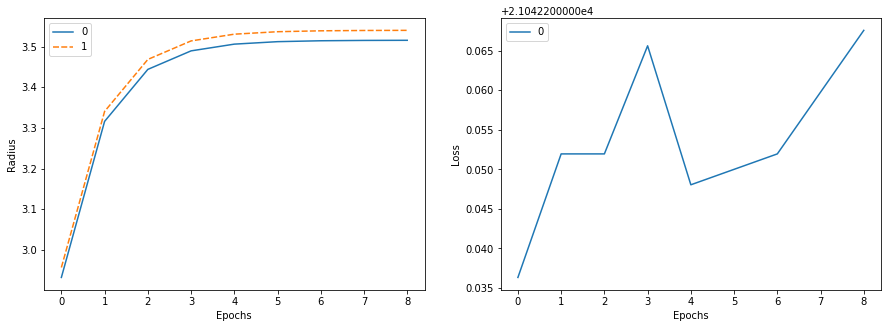

In [9]:
oset = OpenSet(num_classes, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=0.9, wait_patient=3,)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.54it/s]


epoch: 1/50, train_loss: 21.033832550048828, eval_score: 0.5016198360578309


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.54it/s]


epoch: 2/50, train_loss: 21.033830642700195, eval_score: 0.5158617820310625


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.56it/s]


epoch: 3/50, train_loss: 21.03382682800293, eval_score: 0.519925840342223


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.53it/s]


epoch: 4/50, train_loss: 21.033845901489258, eval_score: 0.5229986277602272


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.58it/s]


epoch: 5/50, train_loss: 21.033845901489258, eval_score: 0.5243583140494263


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.52it/s]


epoch: 6/50, train_loss: 21.033838272094727, eval_score: 0.5245066742788715


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.49it/s]


epoch: 7/50, train_loss: 21.033836364746094, eval_score: 0.524523324139585


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.52it/s]


epoch: 8/50, train_loss: 21.03384017944336, eval_score: 0.524523324139585


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.56it/s]


epoch: 9/50, train_loss: 21.033811569213867, eval_score: 0.524523324139585


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.60it/s]


epoch: 10/50, train_loss: 21.03383445739746, eval_score: 0.524523324139585


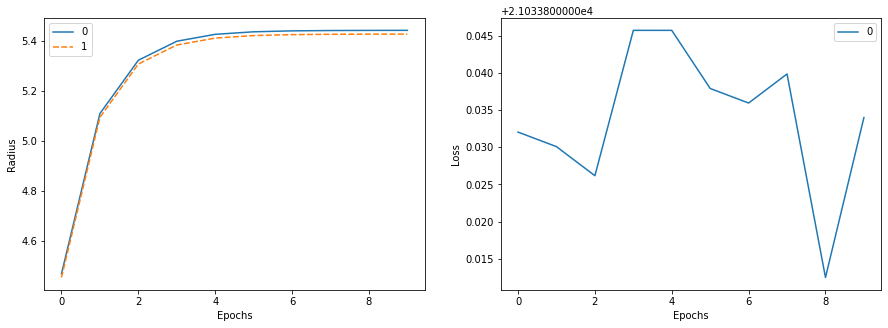

In [10]:
oset = OpenSet(num_classes, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=1.5, wait_patient=3,)

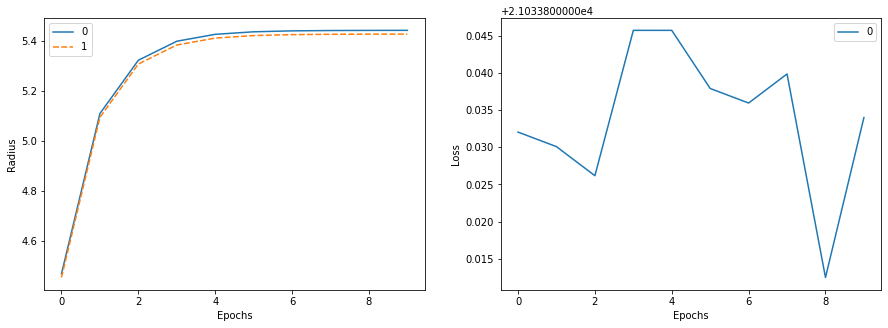

euc_dis: tf.Tensor(
[31.076237   3.3054845 15.240153  15.319946  26.509329   2.0386717
  2.8446226 22.469278   1.9741747 29.928343   2.2635136  2.8958354
 29.928343  29.928343   1.9473809 39.957912   1.8815216 29.928343
 39.957912  29.928343  29.928343  62.384556  29.928343   2.2161524
  2.8446226 76.81108   39.957912  39.957912  39.957912  39.957912
 29.928343  29.928343 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[5.438942 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942
 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942
 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942
 5.438942 5.423889 5.438942 5.438942 5.438942 5.438942 5.438942 5.438942], shape=(32,), dtype=float32)
predictions with ukc_label=2 [2 0 2 2 2 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2]
[[15000     0  1000]
 [    0   678 15322]
 [    0     0     0]]
48.99
f1_weighted: 0.524523324139585, f1_macro: 0.3496822160930568, f1_micro: 0.4899375, 

In [13]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data, zero_div=0)

In [14]:
y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=designated_ukc_cls)

[[1992    0    3]
 [   0   11 1983]
 [   0    0 1995]]
66.81
f1_weighted: 0.5593885670330309, f1_macro: 0.5592969352872573, f1_micro: 0.6681149732620321, f_measure: {'Known': 50.511, 'Open': 66.7671, 'F1-score': 55.9297}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1995
           1       1.00      0.01      0.01      1994
           2       0.50      1.00      0.67      1995

    accuracy                           0.67      5984
   macro avg       0.83      0.67      0.56      5984
weighted avg       0.83      0.67      0.56      5984



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.58it/s]


epoch: 1/50, train_loss: 21.051368713378906, eval_score: 0.5571378643630802


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.59it/s]


epoch: 2/50, train_loss: 21.051349639892578, eval_score: 0.5693041469457779


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.60it/s]


epoch: 3/50, train_loss: 21.051380157470703, eval_score: 0.5758271418967283


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.58it/s]


epoch: 4/50, train_loss: 21.051372528076172, eval_score: 0.577584708931833


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.52it/s]


epoch: 5/50, train_loss: 21.05135726928711, eval_score: 0.5783813946237523


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.58it/s]


epoch: 6/50, train_loss: 21.05136489868164, eval_score: 0.5785405666174083


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.59it/s]


epoch: 7/50, train_loss: 21.051342010498047, eval_score: 0.5787527104201323


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.53it/s]


epoch: 8/50, train_loss: 21.05137062072754, eval_score: 0.5787527104201323


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.53it/s]


epoch: 9/50, train_loss: 21.051366806030273, eval_score: 0.5787527104201323


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.57it/s]


epoch: 10/50, train_loss: 21.05135154724121, eval_score: 0.5787527104201323


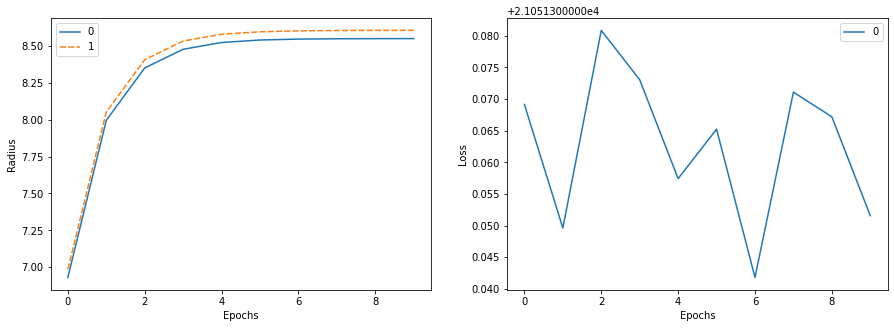

In [15]:
#check the centroids, radius per class and lower the learnig rate
oset = OpenSet(num_classes, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=2.5, wait_patient=3,)

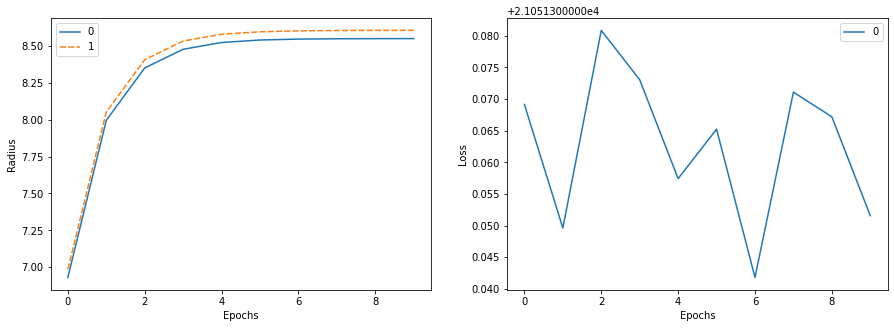

euc_dis: tf.Tensor(
[55.284523   2.4701614 55.284523   4.4229436  1.8602185 27.33275
 55.284523  30.578825   6.8449078  0.9072007  1.7296703  4.4229436
 17.702896  55.284523  31.790531  30.578825   1.9044012 30.578825
 48.71515   58.10859   46.70882   27.216423  22.327686   4.4229436
 55.284523   1.877658  64.67585   30.578825  10.2447405 55.284523
  4.4229436  1.901591 ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[8.602478 8.546634 8.602478 8.546634 8.546634 8.602478 8.602478 8.602478
 8.546634 8.546634 8.546634 8.546634 8.602478 8.602478 8.602478 8.602478
 8.546634 8.602478 8.602478 8.602478 8.602478 8.602478 8.602478 8.546634
 8.602478 8.546634 8.602478 8.602478 8.602478 8.602478 8.546634 8.546634], shape=(32,), dtype=float32)
predictions with ukc_label=999 [999   0 999   0   0 999 999 999   0   0   0   0 999 999 999 999   0 999
 999 999 999 999 999   0 999   0 999 999 999 999   0   0]
[[15989     0    11]
 [    0  1371 14629]
 [    0     0     0]]
54.25
f1_weighted: 0.578

In [16]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data, zero_div=0)

In [17]:
y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=designated_ukc_cls)

[[1996    0    1]
 [   0   36 1957]
 [   0    0 1994]]
67.28
f1_weighted: 0.568951231191186, f1_macro: 0.5686460053867729, f1_micro: 0.6727941176470589, f_measure: {'Known': 51.7618, 'Open': 67.0703, 'F1-score': 56.8646}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       1.00      0.02      0.04      1993
           2       0.50      1.00      0.67      1994

    accuracy                           0.67      5984
   macro avg       0.83      0.67      0.57      5984
weighted avg       0.83      0.67      0.57      5984



In [ ]:
# It cam be observed that when data point is more, the euclidian distances are very large, 
#some of them as high as 55. On the other hand the radius  only expnaded upto 8.5. Hence
# moore than increasing the raius , reducing the euclidian distance will be more benificial.

In [ ]:
#what happens if the data points is halfed
designated_ukc_cls = 2
num_classes = 2
bglog = BGLog(save_padded_num_sequences=False, debug=True,  load_from_pkl=True, )
train_test = bglog.get_tensor_train_val_test(ablation=10000, designated_ukc_cls=designated_ukc_cls )
train_data, val_data, test_data = train_test
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=num_classes)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=val_data, epochs=7) 
#check the centroids, radius per class and lower the learnig rate
oset = OpenSet(num_classes, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=2.5, wait_patient=5,)

ablation set to : 10000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 8000
val_0:, 1000
test_0:, 1000
train_1:, 8000
val_1:, 1000
test_1:, 1000
class 2 is added as ukc
ukc_2:, 1000
902 data in class 3 not enough to split into train:8000 and validation:1000, adding the entire data as ukc
628 data in class 4 not enough to split into train:8000 and validation:1000, adding the entire data as ukc
165 data in class 5 not enough to split into train:8000 and validation:1000, adding the entire data as ukc
75 data in class 6 not enough to split into train:8000 and validation:1000, adding the entire data as ukc
train: 0    8000
1    8000
Name: label, dtype: int64
val: 0    1000
1    1000
Name: label, dtype: int64
test: 0    1000
1    1000
2    1000
Name: label, dtype: int64
[[1. 0.]
 [1. 0.]]
some example of labels:
[[1. 0. 0.]
 [1. 0. 0.]]
[[1. 0.]
 

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:06<00:00,  7.47it/s]


epoch: 1/50, train_loss: 6.127049446105957, eval_score: 0.6259696274445536


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:17<00:00,  6.46it/s]


epoch: 2/50, train_loss: 6.127050399780273, eval_score: 0.6383024558380009


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:21<00:00,  6.17it/s]


epoch: 3/50, train_loss: 6.127049446105957, eval_score: 0.6385808118875848


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:08<00:00,  7.28it/s]


epoch: 4/50, train_loss: 6.1270551681518555, eval_score: 0.6386735572782084


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:08<00:00,  7.27it/s]


epoch: 5/50, train_loss: 6.1270527839660645, eval_score: 0.6386735572782084


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:09<00:00,  7.17it/s]


epoch: 6/50, train_loss: 6.127053260803223, eval_score: 0.6387662826999677


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:10<00:00,  7.13it/s]


epoch: 7/50, train_loss: 6.127050399780273, eval_score: 0.6387662826999677


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:08<00:00,  7.30it/s]


epoch: 8/50, train_loss: 6.127048492431641, eval_score: 0.6387662826999677


 30%|███████████████████████▊                                                        | 149/500 [00:20<00:48,  7.21it/s]

In [ ]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data, zero_div=0)

In [ ]:
y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=designated_ukc_cls)